<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


# Instructions


In this notebook, you will  practice all the classification algorithms that we have learned in this course.


Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report at the end. 


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [208]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [209]:
# # Surpress warnings:
# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

In [210]:
# #you are running the lab in your  browser, so we will install the libraries using ``piplite``
# import piplite
# await piplite.install(['pandas'])
# await piplite.install(['numpy'])


In [211]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [212]:
# from pyodide.http import pyfetch

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())

In [213]:
# path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [214]:
# await download(path, "Weather_Data.csv")
# filename ="Weather_Data.csv"

In [215]:
df = pd.read_csv("Weather_Data.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [216]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_sydney_processed

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,0,0,0,0,0,1,0,0,0,0
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,0,0,0,0,0,0,0,0,0,0
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,0,0,0,0,0,0,0,0,0,0
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,0,0,0,0,0,0,0,0,0,0
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,37,22,20,73,...,0,0,0,0,1,0,0,0,0,0
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,30,20,7,78,...,0,0,0,0,0,0,0,0,0,0
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,24,15,13,85,...,0,0,0,0,0,0,0,0,0,0
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,43,17,19,56,...,0,0,0,0,0,0,0,1,0,0


Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [217]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [218]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [219]:
df_sydney_processed = df_sydney_processed.astype(float)

In [220]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']
features = preprocessing.StandardScaler().fit_transform(features)

### Linear Regression


#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [221]:
#Enter Your Code, Execute and take the Screenshot
features = preprocessing.StandardScaler().fit_transform(features)
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

print(f'x_train shape is: {x_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'x_test shape is: {x_test.shape}')
print(f'y_test shape is: {y_test.shape}')

if x_train.shape[0] == y_train.shape[0] and x_test.shape[0] == y_test.shape[0]:
    print('\nThe shapes of train and test sets match,\nGood to go!')
else:
    raise 'Shapes Don\'t Match'


x_train shape is: (2616, 66)
y_train shape is: (2616,)
x_test shape is: (655, 66)
y_test shape is: (655,)

The shapes of train and test sets match,
Good to go!


#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [222]:
#Enter Your Code, Execute and take the Screenshot
LinearReg = LinearRegression()
LinearReg.fit(x_train,y_train)

print(f'Coefficients (first 5): {LinearReg.coef_.round(2)[:5]}')
print()
print(f'Intercept: {LinearReg.intercept_.round(2)}')

Coefficients (first 5): [-0.11  0.06  0.01  0.02 -0.13]

Intercept: 0.26


#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [223]:
#Enter Your Code, Execute and take the Screenshot
predictions = LinearReg.predict(x_test)
print(f'Predictions (first 5 rows): {predictions[:5]}')
print(f'Actual (first 5): {y_test.values[:5]}')

Predictions (first 5 rows): [0.10743067 0.27539942 0.96680567 0.30469629 0.12110254]
Actual (first 5): [0. 0. 1. 1. 0.]


#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [224]:
#Enter Your Code, Execute and take the Screenshot
LinearRegression_MAE = metrics.mean_absolute_error(y_test, predictions)
LinearRegression_MSE = metrics.mean_squared_error(y_test, predictions)
LinearRegression_R2 = metrics.r2_score(y_test, predictions)

print('Mean Absolute Error (MAE): %.2f' % LinearRegression_MAE)
print('Mean Squared Error (MSE): %.2f' % LinearRegression_MSE)
print('R-squared score: %.2f' % LinearRegression_R2)

Mean Absolute Error (MAE): 0.26
Mean Squared Error (MSE): 0.12
R-squared score: 0.43


#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [225]:
#Enter Your Code, Execute and take the Screenshot
LinearReg_report = pd.DataFrame({
    'Metrics':['MAE', 'MSE', 'R2'],
    'Scores': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]
})
LinearReg_report

,Metrics,Scores
0,MAE,0.256861
1,MSE,0.116130
2,R2,0.425104


### KNN


#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [226]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output
print('The x_train and x_test are already normalized in the above cells.')
KNN = KNeighborsClassifier(n_neighbors=4).fit(x_train, y_train)
KNN

The x_train and x_test are already normalized in the above cells.


KNeighborsClassifier(n_neighbors=4)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [227]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output
predictions = KNN.predict(x_test)
print(f'Predictions (first 5): {predictions[:5]}')
print(f'Actual (first 5): {y_test.values[:5]}')

Predictions (first 5): [0. 1. 1. 1. 0.]
Actual (first 5): [0. 0. 1. 1. 0.]


#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [228]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output
KNN_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
KNN_JaccardIndex = metrics.jaccard_score(y_test, predictions)
KNN_F1_Score = metrics.f1_score(y_test, predictions)

print('Accuracy Score: %.2f' % KNN_Accuracy_Score)
print('Jaccard Index: %.2f' % KNN_JaccardIndex)
print('F1 Score: %.2f' % KNN_F1_Score)

Accuracy Score: 0.76
Jaccard Index: 0.24
F1 Score: 0.39


In [229]:
KNN_report = pd.DataFrame({
    'Metrics':['Accuracy Score', 'Jaccard Index', 'F1 Score'],
    'Scores':[KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score]
})

KNN_report.Scores = KNN_report.Scores
KNN_report

,Metrics,Scores
0,Accuracy Score,0.760305
1,Jaccard Index,0.241546
2,F1 Score,0.389105


### Decision Tree


#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [230]:
#Enter Your Code, Execute and take the Screenshot
print('One hot encoding and normalization was already done in the above cells,')
Tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
Tree.fit(x_train, y_train)

One hot encoding and normalization was already done in the above cells,


DecisionTreeClassifier(criterion='entropy', max_depth=4)

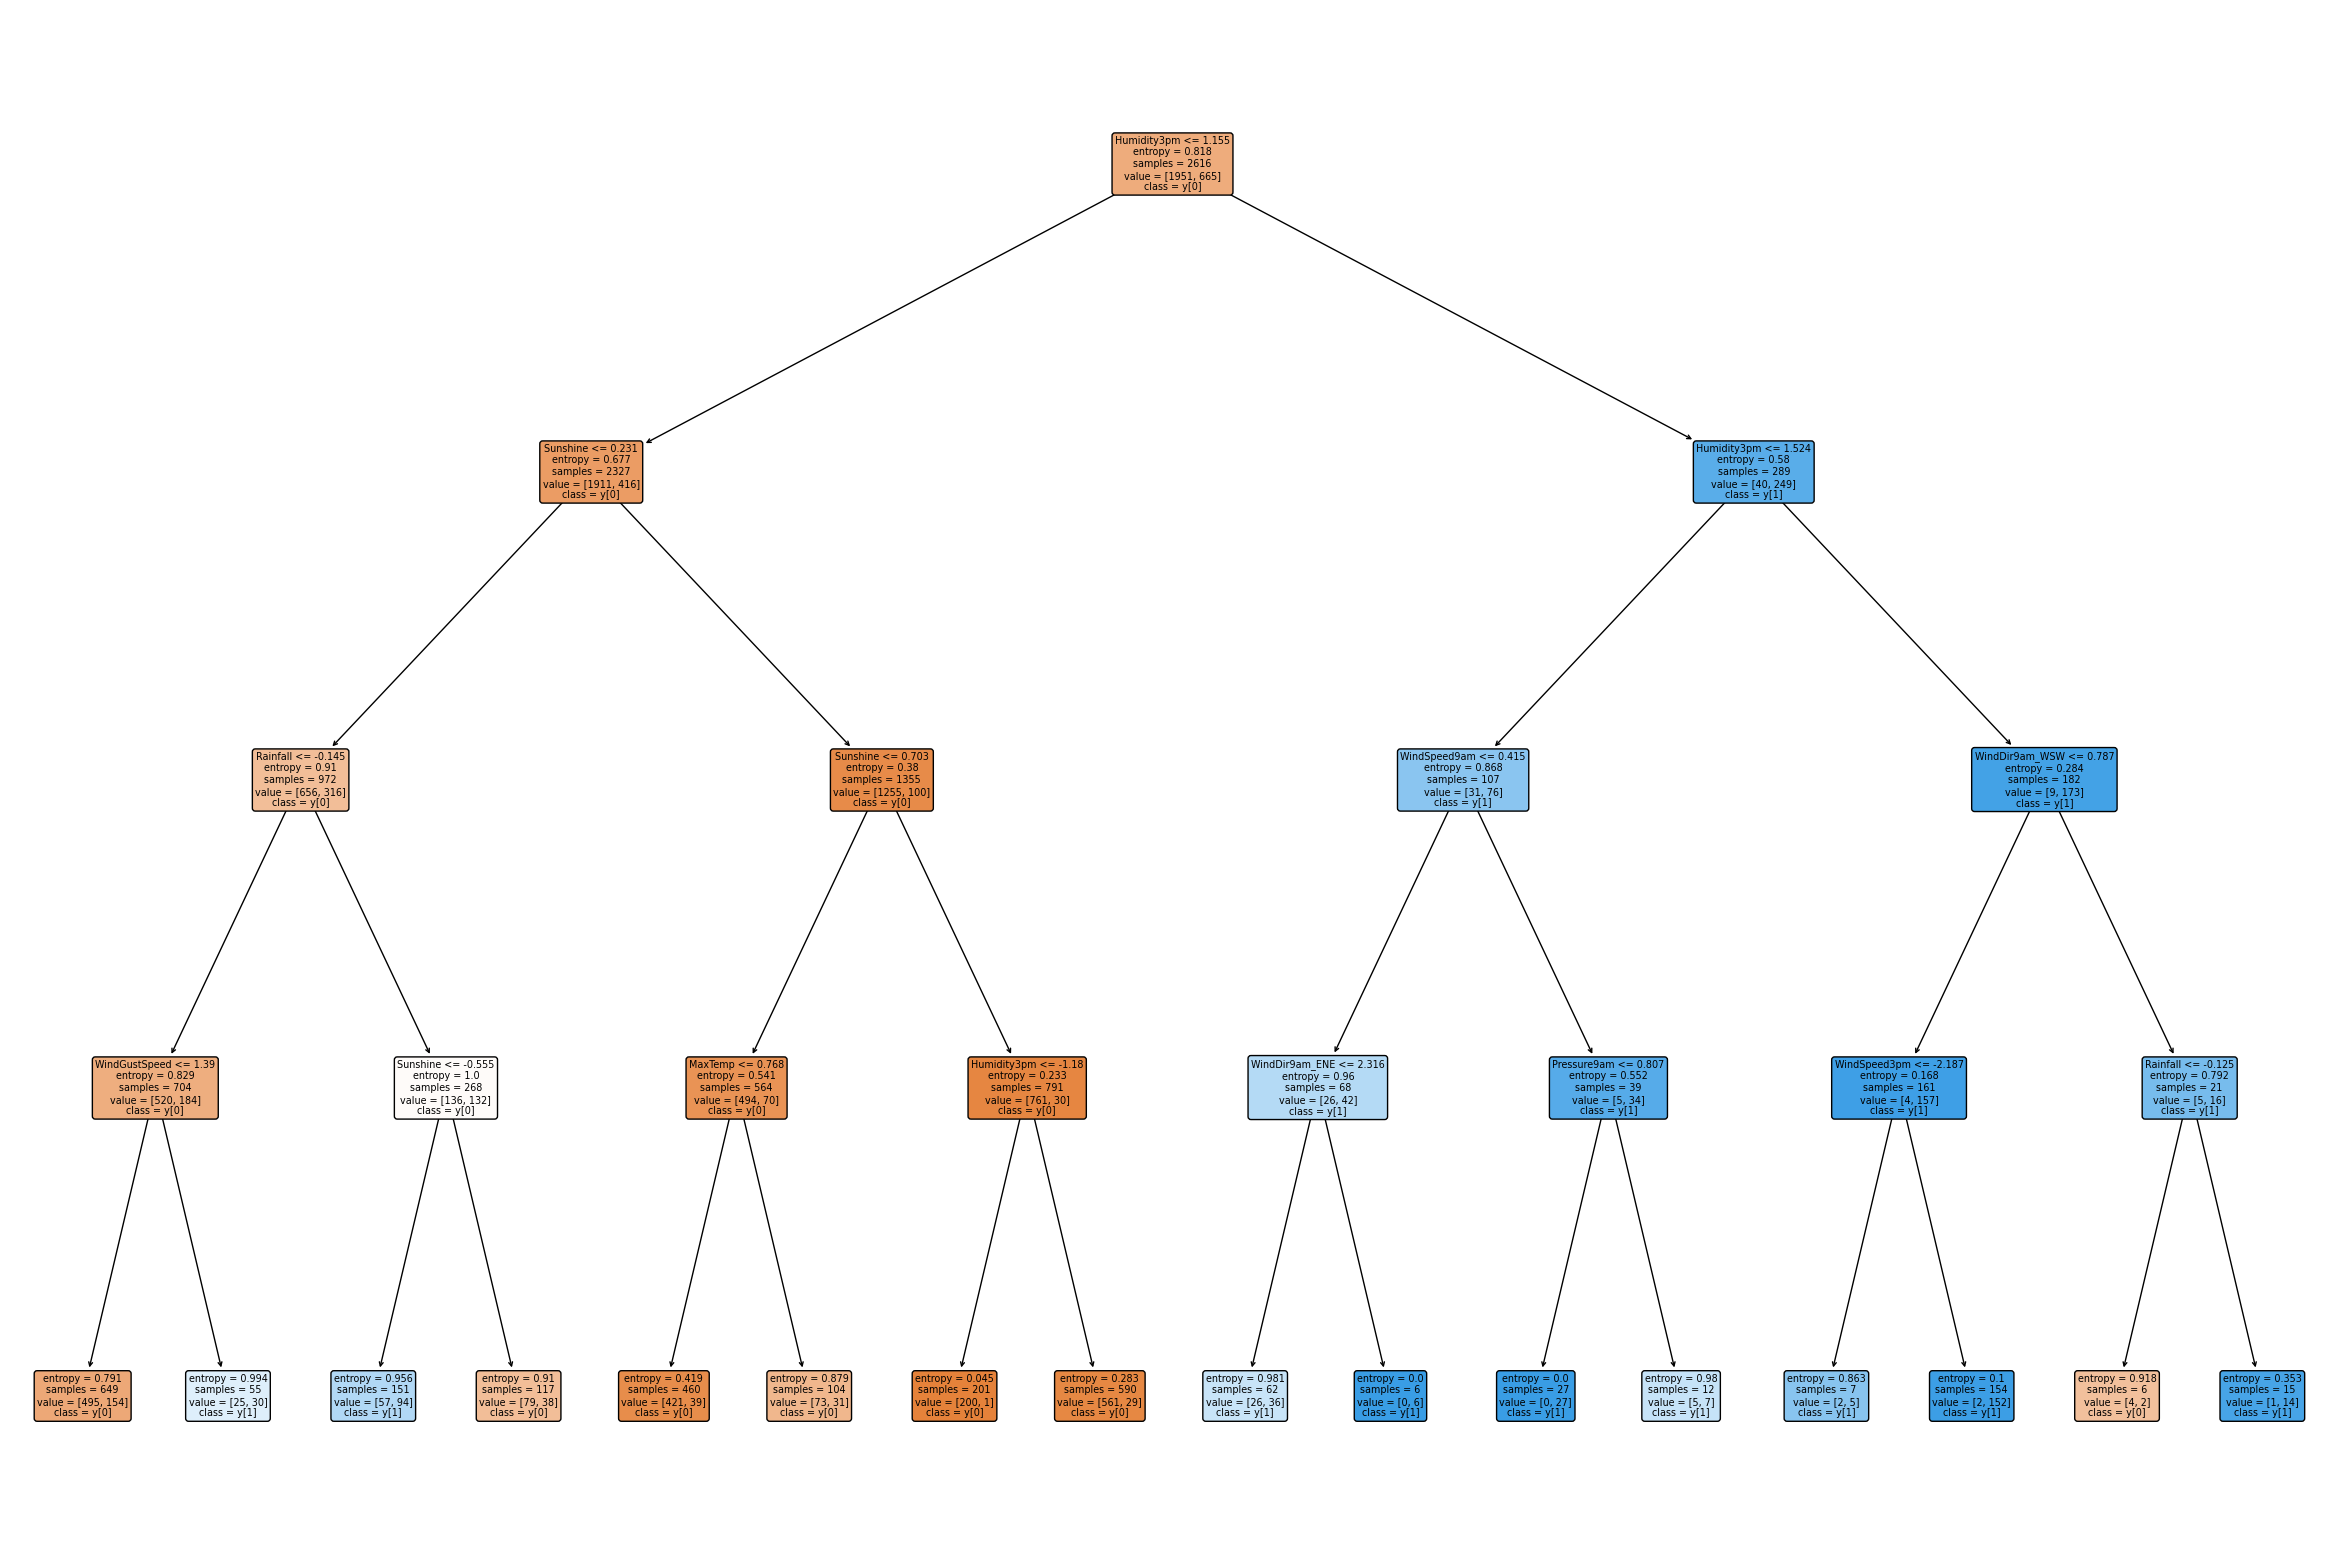

In [231]:
import sklearn.tree as tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,20))
tree.plot_tree(Tree, filled=True, feature_names= df_sydney_processed.columns,class_names=True, rounded=True)
plt.show()

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [232]:
#Enter Your Code, Execute and take the Screenshot
predictions = Tree.predict(x_test)
print(f'Predictions (first 5): {predictions[:5]}')
print(f'Actual (first 5): {y_test.values[:5]}')

Predictions (first 5): [0. 0. 1. 0. 0.]
Actual (first 5): [0. 0. 1. 1. 0.]


#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [233]:
#Enter Your Code, Execute and take the Screenshot
Tree_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
Tree_JaccardIndex = metrics.jaccard_score(y_test, predictions)
Tree_F1_Score = metrics.f1_score(y_test, predictions)

print('Accuracy Score: %.2f' % Tree_Accuracy_Score)
print('Jaccard Index: %.2f' % Tree_JaccardIndex)
print('F1 Score: %.2f' % Tree_F1_Score)

Accuracy Score: 0.82
Jaccard Index: 0.48
F1 Score: 0.65


In [234]:
Tree_report = pd.DataFrame({
    'Metrics':['Accuracy Score', 'Jaccard Index', 'F1 Score'],
    'Scores':[Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score]
})

Tree_report.Scores = Tree_report.Scores
Tree_report

,Metrics,Scores
0,Accuracy Score,0.818321
1,Jaccard Index,0.480349
2,F1 Score,0.648968


### Logistic Regression


#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [235]:
#Enter Your Code, Execute and take the Screenshot
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

print(f'x_train shape is: {x_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'x_test shape is: {x_test.shape}')
print(f'y_test shape is: {y_test.shape}')

if x_train.shape[0] == y_train.shape[0] and x_test.shape[0] == y_test.shape[0]:
    print('\nThe shapes of train and test sets match,\nGood to go!')
else:
    raise 'Shapes Don\'t Match'

x_train shape is: (2616, 66)
y_train shape is: (2616,)
x_test shape is: (655, 66)
y_test shape is: (655,)

The shapes of train and test sets match,
Good to go!


#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [236]:
#Enter Your Code, Execute and take the Screenshot
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

#### Q14) Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.


In [237]:
#Enter Your Code, Execute and take the Screenshot
predictions = LR.predict(x_test)
predictions_proba = LR.predict_proba(x_test)
print(f'Predictions (first 5): {predictions[:5]}')
print(f'Prediction Probabilities (first 5):\n {predictions_proba[:5].round(2)}')
print(f'Actual (first 5): {y_test.values[:5]}')

Predictions (first 5): [0. 0. 0. 0. 0.]
Prediction Probabilities (first 5):
 [[0.51 0.49]
 [0.94 0.06]
 [0.52 0.48]
 [0.78 0.22]
 [0.94 0.06]]
Actual (first 5): [0. 0. 0. 0. 0.]


#### Q15) Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [238]:
#Enter Your Code, Execute and take the Screenshot
LR_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
LR_JaccardIndex = metrics.jaccard_score(y_test, predictions)
LR_F1_Score = metrics.f1_score(y_test, predictions)
LR_Log_Loss = metrics.log_loss(y_test, predictions_proba)

print('Accuracy Score: %.2f' % LR_Accuracy_Score)
print('Jaccard Index: %.2f' % LR_JaccardIndex)
print('F1 Score: %.2f' % LR_F1_Score)
print('Log Loss: %.2f' % LR_Log_Loss)

Accuracy Score: 0.83
Jaccard Index: 0.50
F1 Score: 0.67
Log Loss: 0.39


In [239]:
LR_report = pd.DataFrame({
    'Metrics':['Accuracy Score', 'Jaccard Index', 'F1 Score', 'Log Loss'],
    'Scores':[LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score, LR_Log_Loss]
})

LR_report.Scores = LR_report.Scores
LR_report

,Metrics,Scores
0,Accuracy Score,0.825954
1,Jaccard Index,0.502183
2,F1 Score,0.668605
3,Log Loss,0.388603


### SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [240]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train, y_train)

SVC()

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [241]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output
predictions = SVM.predict(x_test)

print(f'Predictions (first 5): {predictions[:5]}')
print(f'Actual (first 5): {y_test.values[:5]}')

Predictions (first 5): [0. 0. 0. 0. 0.]
Actual (first 5): [0. 0. 0. 0. 0.]


#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [242]:
SVM_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
SVM_JaccardIndex = metrics.jaccard_score(y_test, predictions)
SVM_F1_Score = metrics.f1_score(y_test, predictions)

print('Accuracy Score: %.2f' % SVM_Accuracy_Score)
print('Jaccard Index: %.2f' % SVM_JaccardIndex)
print('F1 Score: %.2f' % SVM_F1_Score)

Accuracy Score: 0.83
Jaccard Index: 0.47
F1 Score: 0.64


In [243]:
SVM_report = pd.DataFrame({
    'Metrics':['Accuracy Score', 'Jaccard Index', 'F1 Score'],
    'Scores':[SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score]
})

SVM_report.Scores = SVM_report.Scores
SVM_report

,Metrics,Scores
0,Accuracy Score,0.829008
1,Jaccard Index,0.466667
2,F1 Score,0.636364


### Report


#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [246]:
Report = pd.concat([
    KNN_report['Scores'],
    Tree_report['Scores'],
    LR_report['Scores'],
    SVM_report['Scores']],
    axis=1).T
algorithms = ['KNN', 'Decision Tree', 'LR', 'SVM']
metrics_used = ['Accuracy', 'Jaccard', 'F1-Score', 'LogLoss']
Report.index = algorithms
Report.columns = metrics_used

Report

,Accuracy,Jaccard,F1-Score,LogLoss
KNN,0.760305,0.241546,0.389105,NaN
Decision Tree,0.818321,0.480349,0.648968,NaN
LR,0.825954,0.502183,0.668605,0.388603
SVM,0.829008,0.466667,0.636364,NaN


<h2 id="Section_5">  How to submit </h2>

<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.

<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

### Other Contributors

[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2022-06-22        | 2.0     | Svitlana K.   | Deleted GridSearch and Mock |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
